In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# 超参数
EPOCH = 1
BATCH_SIZE = 64
LR = 0.001

my_tf = transforms.Compose([
                            transforms.Resize(224), 
                            transforms.ToTensor()])

# 下载fashion-mnist
train_data = datasets.FashionMNIST(root='/nas/fashion-mnist/', train=True, transform=my_tf, download=True)
test_data = datasets.FashionMNIST(root='/nas/fashion-mnist/', train=False, transform=my_tf, download=True)

print('训练集大小:', train_data.train_data.size())
print('训练集标签个数:', train_data.train_labels.size())
print('测试集大小:', test_data.test_data.size())

训练集大小: torch.Size([60000, 28, 28])
训练集标签个数: torch.Size([60000])
测试集大小: torch.Size([10000, 28, 28])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


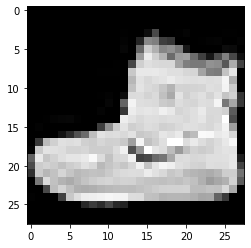

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')

In [14]:
from torch.utils.data import DataLoader

# 使用DataLoader进行分批
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # 原始图是灰度图，1个通道，现在需要转化为3个通道
    self.conv = nn.Conv2d(1, 3, kernel_size=1)
    self.vgg16 = torchvision.models.vgg16(pretrained=False)

  def forward(self, x):
    x = self.conv(x)
    x = self.vgg16(x)

    return x

In [15]:
# 加载模型
model = Net()
# 定义损失
criterion = nn.CrossEntropyLoss()
# 定义优化器
optimizer = optim.Adam(model.parameters(), lr=LR)

# 设置设备
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 训练
for epoch in range(EPOCH):
  for i, data in enumerate(train_loader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # 前向传播
    outputs = model(inputs)
    # 计算损失
    loss = criterion(outputs, labels)
    print('iteration{}, loss:{:.4f}'.format(i+1, loss.item()))
    # 清空上一轮梯度
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 参数更新呢
    optimizer.step()

iteration1, loss:6.9171
iteration2, loss:227.2087
iteration3, loss:6.3721
iteration4, loss:6.8186
iteration5, loss:6.2578
iteration6, loss:5.9266
iteration7, loss:3.0928
iteration8, loss:2.9957
iteration9, loss:3.1480
iteration10, loss:3.6097
iteration11, loss:3.0805
iteration12, loss:3.0162
iteration13, loss:3.5807
iteration14, loss:2.8335
iteration15, loss:3.1801
iteration16, loss:3.1964
iteration17, loss:2.7811
iteration18, loss:2.6205
iteration19, loss:2.7319
iteration20, loss:2.6742
iteration21, loss:3.0469
iteration22, loss:2.6236
iteration23, loss:2.4369
iteration24, loss:2.7222
iteration25, loss:2.5361
iteration26, loss:2.4825
iteration27, loss:2.3662
iteration28, loss:2.3870
iteration29, loss:2.3394
iteration30, loss:2.4173
iteration31, loss:2.4183
iteration32, loss:2.3631
iteration33, loss:2.3593
iteration34, loss:2.3622
iteration35, loss:2.4068
iteration36, loss:2.3999
iteration37, loss:2.3030
iteration38, loss:2.3433
iteration39, loss:2.2756
iteration40, loss:2.3595
iterati

In [16]:
# 测试
model.eval()
correct, total = 0, 0
for data in test_loader:
  images, labels = data
  images, labels = images.to(device), labels.to(device)
  out = model(images)
  _, predicted = torch.max(out.data, 1)
  total = total + labels.size(0)
  correct = correct + (predicted == labels).sum().item()

print('测试图像正确率:{:.4f}%'.format(100*correct/total))

RuntimeError: ignored